<a href="https://colab.research.google.com/github/Dayana-22/Investigaci-n-de-operaciones/blob/main/discrete_event_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Queueing Theory Intro
## Discrete Event Simulation
Carlos Alexander Grajales Correa \\
Professor Universidad de Antioquia, Colombia \\
alexander.grajales@udea.edu.co \\
**Reference:**
*This notebook contains code examples referring to the book*

"Applied Mathematics with Open-Source Software: Operational Research Problems
with Python and R". Chapter: Discrete Event Simulation.   Vincent Knight and Geraint Palmer.  CRC Press Taylor and Francis Group, 2022.*


\\


☝ Before start

At Google Colab, for this intro, you will first need to install

* ciw
___

In [ ]:
!pip install ciw
import ciw

# Bicycle Repair Shop Problem

A bicycle repair shop would like to reconfigure in order to guarantee that all bicycles processed take a maximum of 30 minutes. Their current set-up is as follows:

* Bicycles arrive randomly at the shop at a rate of 15 per hour;
* they wait in line to be seen at an inspection counter, staffed by one member of staff who can inspect one bicycle at a time. On average an inspection takes around 3 minutes;
* around 20% of bicycles do not need repair after inspection, and they are then ready for collection;
* around 80% of bicycles go on to be repaired after inspection. These then wait in line outside the repair workshop, which is staffed by two members of staff who can each repair one bicycle at a time. On average a repair takes around 6 minutes;
* after repair the bicycles are ready for collection.

An assumption of infinite capacity at the bicycle repair shop for waiting bicycles is made.The shop will hire an extra member of staff in order to meet their target of a maximum time in the system of 30 minutes. They would like to know if they should work on the inspection counter or in the repair workshop.

___

☝ First we define a function that gives a Network object, containing the structure of the repair shop.

In [ ]:
def build_network_object(
    num_inspectors=1,
    num_repairers=2,
):
    """Returns a Network object that defines the repair shop.

    Args:
        num_inspectors: a positive integer (default: 1)
        num_repairers: a positive integer (default: 2)

    Returns:
        a Ciw network object
    """
    arrival_rate = 15
    inspection_rate = 20
    repair_rate = 10
    prob_need_repair = 0.8
    N = ciw.create_network(
        arrival_distributions=[
            ciw.dists.Exponential(arrival_rate),
            None,
            #ciw.dists.NoArrivals(),
        ],
        service_distributions=[
            ciw.dists.Exponential(inspection_rate),
            ciw.dists.Exponential(repair_rate),
        ],
        number_of_servers=[num_inspectors, num_repairers],
        routing=[[0.0, prob_need_repair], [0.0, 0.0]],
    )
    return N

☝ We can see information such as number of nodes in the network:

In [ ]:
N = build_network_object()
print(N.number_of_nodes)

2


☝ Then we define a function that runs one trial of the simulation.

In [ ]:
def run_simulation(network, seed=0):
    """Builds a simulation object and runs it for 8 time units.

    Args:
        network: a Ciw network object
        seed: a float (default: 0)

    Returns:
        a Ciw simulation object after a run of the simulation
    """
    max_time = 8
    ciw.seed(seed)
    Q = ciw.Simulation(network)
    Q.simulate_until_max_time(max_time)
    return Q

☝ From one trial we can obtain the proportion of bicycles taking over half an hour:

In [ ]:
import pandas as pd


def get_proportion(Q):
    """Returns the proportion of bicycles spending over a given
    limit at the repair shop.

    Args:
        Q: a Ciw simulation object after a run of the
           simulation

    Returns:
        a real
    """
    limit = 0.5
    inds = Q.nodes[-1].all_individuals
    recs = pd.DataFrame(
        dr for ind in inds for dr in ind.data_records
    )
    recs["total_time"] = recs["exit_date"] - recs["arrival_date"]
    total_times = recs.groupby("id_number")["total_time"].sum()
    return (total_times > limit).mean()

☝ Putting all this together for one trial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

N = build_network_object()
Q = run_simulation(N)
p = get_proportion(Q)

recs = Q.get_all_records()
recs_pd = pd.DataFrame(recs)
recs_pd.to_excel("recsExcel.xlsx")


☝ A function to find the average proportion over a number of trials

In [ ]:
def get_average_proportion(num_inspectors=1, num_repairers=2):
    """Returns the average proportion of bicycles spending over a
    given limit at the repair shop.

    Args:
        num_inspectors: a positive integer (default: 1)
        num_repairers: a positive integer (default: 2)

    Returns:
        a real
    """
    num_trials = 100
    N = build_network_object(
        num_inspectors=num_inspectors,
        num_repairers=num_repairers,
    )
    proportions = []
    for trial in range(num_trials):
        Q = run_simulation(N, seed=trial)
        proportion = get_proportion(Q=Q)
        proportions.append(proportion)
    return sum(proportions) / num_trials


☝ The proportion with current staff:

In [ ]:
p = get_average_proportion(num_inspectors=1, num_repairers=2)
print(round(p, 6))

0.159354


☝ The proportion with an extra inspector:

In [ ]:
p = get_average_proportion(num_inspectors=2, num_repairers=2)
print(round(p, 6))

0.038477


☝ The proportion with an extra repairer:

In [ ]:
p = get_average_proportion(num_inspectors=1, num_repairers=3)
print(round(p, 6))

0.103591


☝ The proportion with an extra inspector and extra repairer:

In [ ]:
p = get_average_proportion(num_inspectors=2, num_repairers=3)
print(round(p, 6))

0.012384


**RESPUESTAS DEL TALLER**

**Pregunta 1**

Establezca la semilla seed en cero y simule el taller de reparación de bicicletas durante un período de 8 horas. El número de bicicletas que ingresan al sistema y que salen del sistema
son, respectivamente:

In [ ]:
#Número de bicicletas que ingresan al sistema
Q.nodes[0].number_of_individuals
print(f"Bicicletas que ingresan al sistema: {Q.nodes[0].number_of_individuals}")

#Número de bicicletas que salen del sistema
Q.nodes[-1].number_of_individuals
print(f"Bicicletas que salen del sistema: {Q.nodes[-1].number_of_individuals}")

Bicicletas que ingresan al sistema: 118
Bicicletas que salen del sistema: 111


**Pregunta 2**

Establezca la semilla seed en cero y simule el taller de reparación de bicicletas durante un
período de 8 horas. Al final de la simulación, ¿cuántas bicicletas están siendo atendidas en el
nodo de reparación?

In [ ]:
# Revisar cuántas están siendo atendidas al final (no han terminado su servicio)
bicis_en_reparacion = [
    r for r in records
    if r.node == 2 and (r.service_end_date is None or r.service_end_date > 8.0)
]
print(f"Bicicletas en reparación: {len(bicis_en_reparacion)}")

Bicicletas en reparación: 0


**Pregunta 3**

Establezca la semilla seed en cero y simule el taller de reparación de bicicletas durante un
período de 8 horas. El factor de ocupación del inspector de bicicletas es aproximadamente:

In [ ]:
# Ejecutar la simulación con seed=0
N = build_network_object()
Q = run_simulation(N, seed=0)

# Utilización del nodo 1 (inspector)
util_inspector = Q.nodes[1].server_utilisation

# Mostrar resultado en porcentaje
print(f"Utilización del inspector: {util_inspector * 100:.2f}%")

# Mostrar resultado en porcentaje redondeado al entero más cercano
util_percent = round(util_inspector * 100)
print(f"Utilización del inspector redondeado al entero más cercano: {util_percent}%")

Utilización del inspector: 81.88%
Utilización del inspector redondeado al entero más cercano: 82%


**Pregunta 4**

Establezca la semilla seed en cero y simule el taller de reparación de bicicletas durante un
período de 8 horas. La proporción de bicicletas que permanence en el sistema más de 30
minutos es aproximadamente:

In [ ]:
def get_proportion(Q):
    limit = 0.5  # 30 minutos
    inds = Q.nodes[-1].all_individuals
    recs = pd.DataFrame(dr for ind in inds for dr in ind.data_records)
    recs["total_time"] = recs["exit_date"] - recs["arrival_date"]
    total_times = recs.groupby("id_number")["total_time"].sum()
    return (total_times > limit).mean()

p = get_proportion(Q)
print(p)

# Mostrar como porcentaje redondeado
p_percent = round(p * 100)
p_percent = p * 100
print(f"Proporción de bicicletas que permanecen en el sistema > 30 minutos en porcentaje: {p_percent:.2f}%")

0.26126126126126126
Proporción de bicicletas que permanecen en el sistema > 30 minutos en porcentaje: 26.13%


**Pregunta 5**

Simule el taller de reparación de bicicletas durante un período de 8 horas y por 100 días. En
cada una de las 100 iteraciones, establezca la semilla seed en los volares 1, 2, ... ,
100, respectivamente.
El código suministrado revela que acualmente la proporción de bicicletas que toman más de
30 minutos en el sistema es 15.9%. La decision justificada que debe tomar el administrador
del taller de reparación, para cumplir su objetivo es:

In [ ]:
#Proporción actual del sistema
p = get_average_proportion(num_inspectors=1, num_repairers=2)
print(round(p, 6))
print(f"proporción actual: {p * 100:.2f}%")

0.159354
proporción actual: 15.94%


In [ ]:
#Opción a-contratar empleado adicional en el nodo de inspección
p = get_average_proportion(num_inspectors=2, num_repairers=2)
print(round(p, 6))
print(f"opción A-contratar empleado adicional en el nodo de inspección: {p * 100:.2f}%")

#Opción b-contratar enpleado adicional en el nodo de inspección
p = get_average_proportion(num_inspectors=2, num_repairers=2)
print(round(p, 6))
print(f"opción B-contratar empleado adicional en el nodo de inspección: {p * 100:.2f}%")


#Opción c-contratar enpleado adicional en el nodo de reparación
p = get_average_proportion(num_inspectors=1, num_repairers=3)
print(round(p, 6))
print(f"opción C-contratar empleado adicional en el nodo de inspección: {p * 100:.2f}%")


#Opción d-contratar enpleado adicional en el nodo de reparación
p = get_average_proportion(num_inspectors=1, num_repairers=3)
print(round(p, 6))
print(f"opción D-contratar empleado adicional en el nodo de inspección: {p * 100:.2f}%")

0.038477
opción A-contratar empleado adicional en el nodo de inspección: 3.85%
0.038477
opción B-contratar empleado adicional en el nodo de inspección: 3.85%
0.103591
opción C-contratar empleado adicional en el nodo de inspección: 10.36%
0.103591
opción D-contratar empleado adicional en el nodo de inspección: 10.36%


**Pregunta 6**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

N = build_network_object()
Q = run_simulation(N)
p = get_proportion(Q)

recs = Q.get_all_records()
recs_pd = pd.DataFrame(recs)
recs_pd.to_excel("recsExcel.xlsx")

# Leer el archivo Excel
df = pd.read_excel("recsExcel.xlsx")

# Mostrar las primeras filas para verificar
print(df.head())


   Unnamed: 0  id_number customer_class original_customer_class  node  \
0           0          1       Customer                Customer     1   
1           1          1       Customer                Customer     2   
2           2          2       Customer                Customer     1   
3           3          4       Customer                Customer     1   
4           4          3       Customer                Customer     1   

   arrival_date  waiting_time  service_start_date  service_time  \
0      0.124040      0.000000            0.124040      0.070931   
1      0.194972      0.000000            0.194972      0.036142   
2      0.160421      0.034551            0.194972      0.076577   
3      0.228128      0.078550            0.306677      0.070489   
4      0.180398      0.091152            0.271549      0.035128   

   service_end_date  time_blocked  exit_date  destination  \
0          0.194972             0   0.194972            2   
1          0.231114             0   

Primeras filas:
   Unnamed: 0  id_number customer_class original_customer_class  node  \
0           0          1       Customer                Customer     1   
1           1          1       Customer                Customer     2   
2           2          2       Customer                Customer     1   
3           3          4       Customer                Customer     1   
4           4          3       Customer                Customer     1   

   arrival_date  waiting_time  service_start_date  service_time  \
0      0.124040      0.000000            0.124040      0.070931   
1      0.194972      0.000000            0.194972      0.036142   
2      0.160421      0.034551            0.194972      0.076577   
3      0.228128      0.078550            0.306677      0.070489   
4      0.180398      0.091152            0.271549      0.035128   

   service_end_date  time_blocked  exit_date  destination  \
0          0.194972             0   0.194972            2   
1          0.231114 

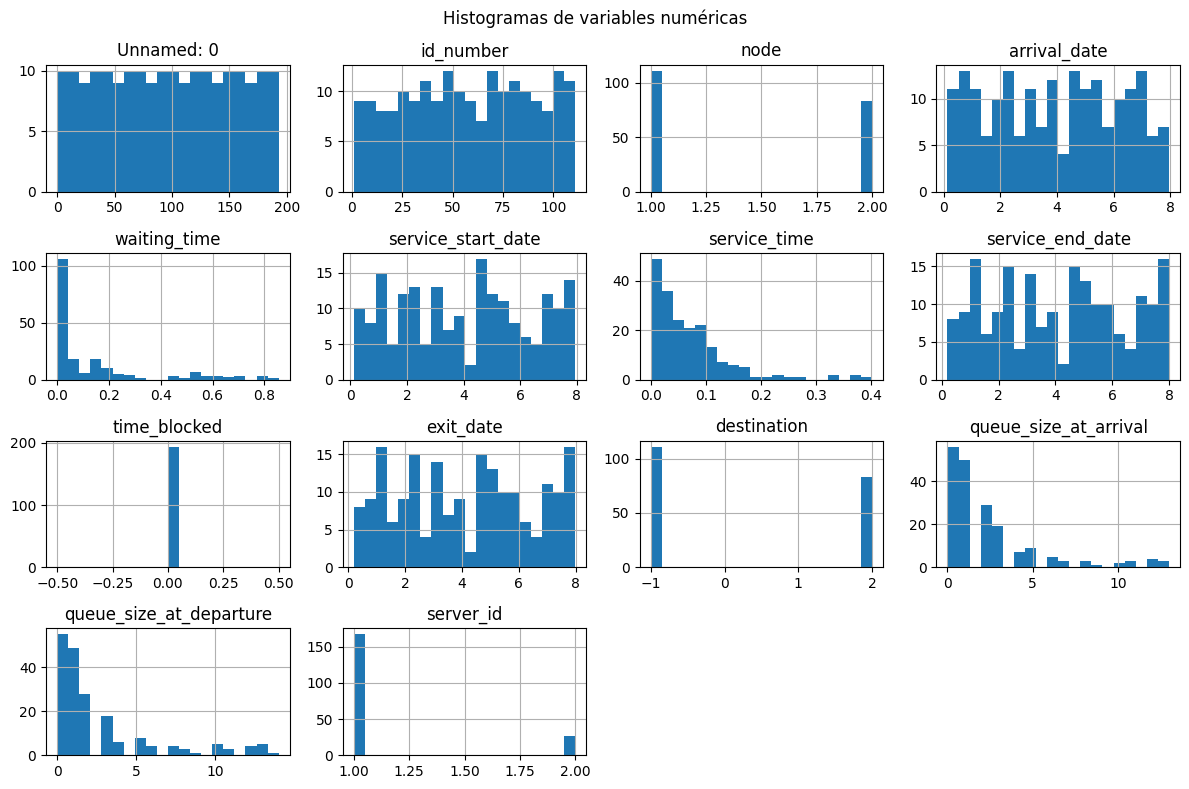

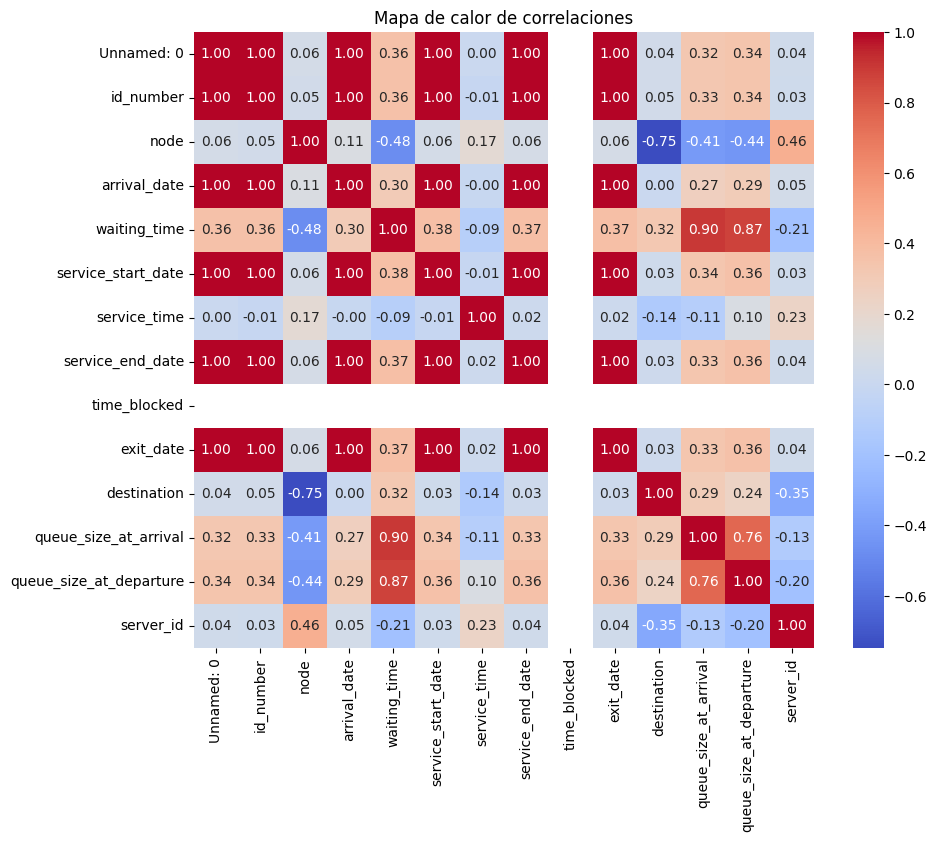

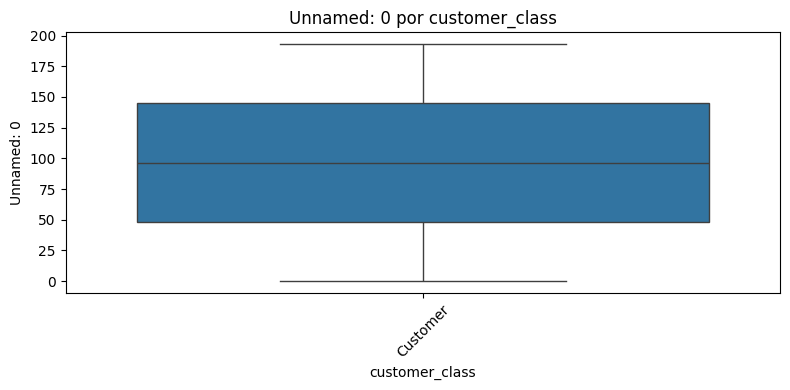

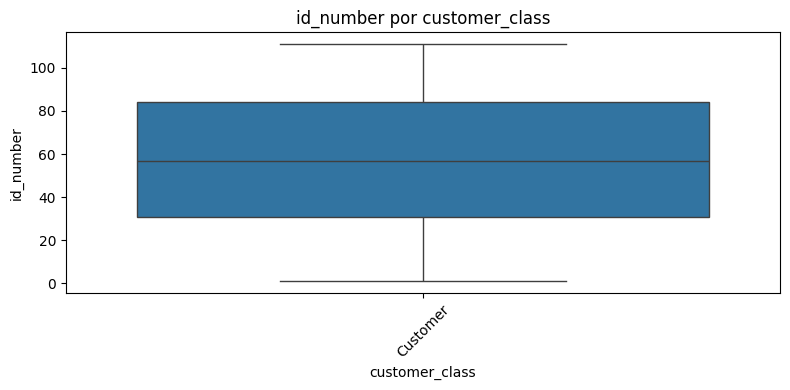

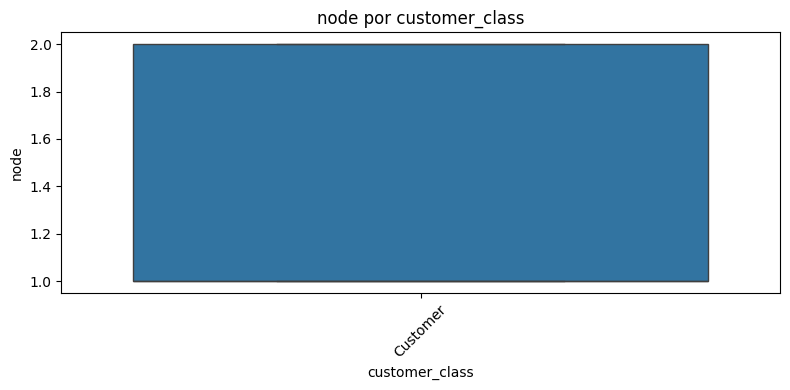

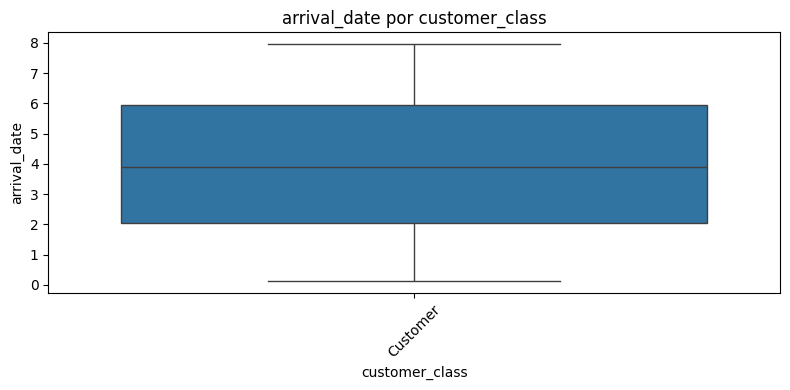

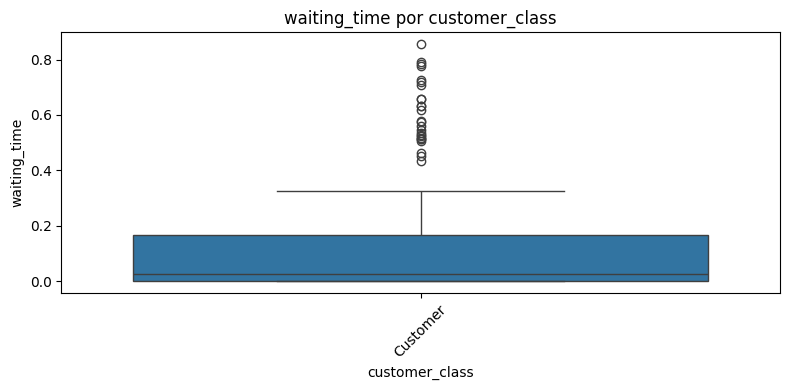

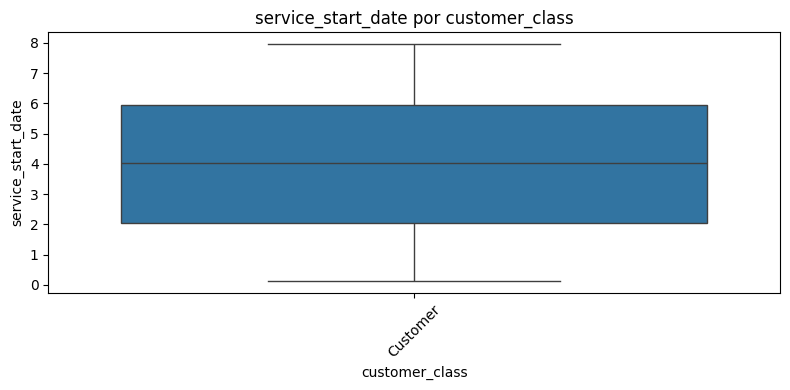

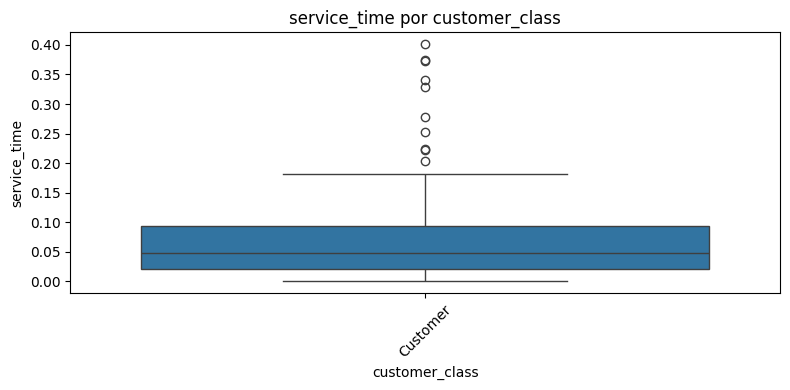

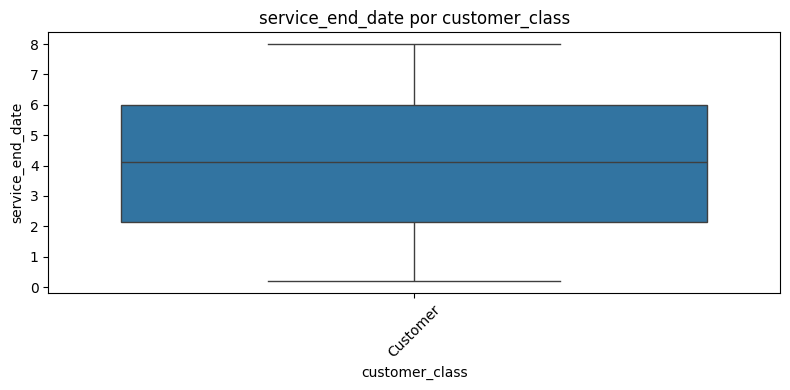

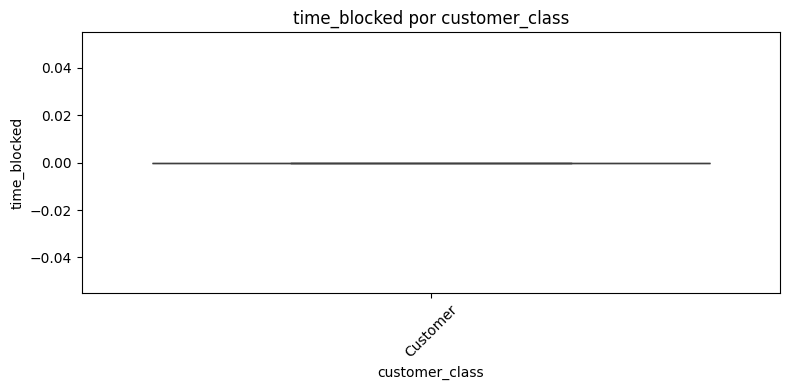

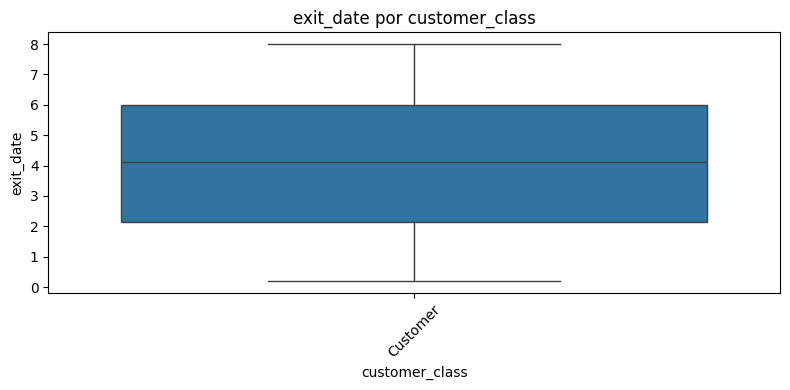

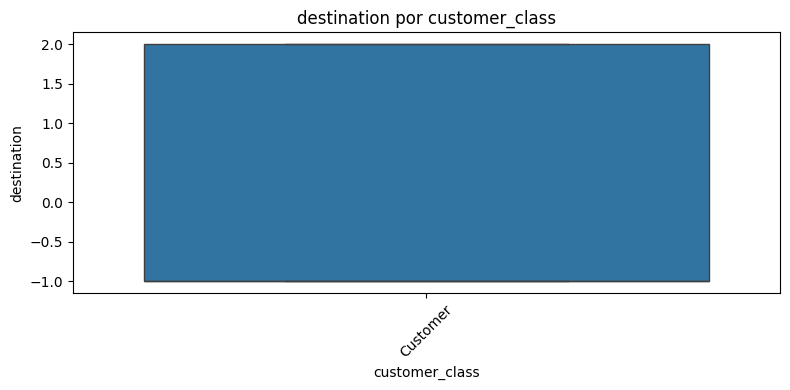

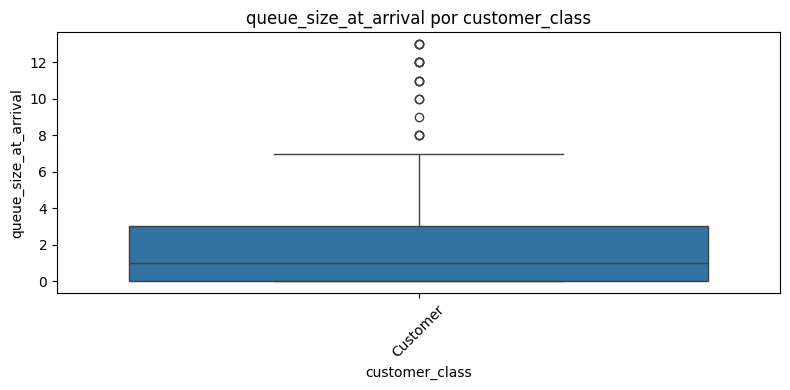

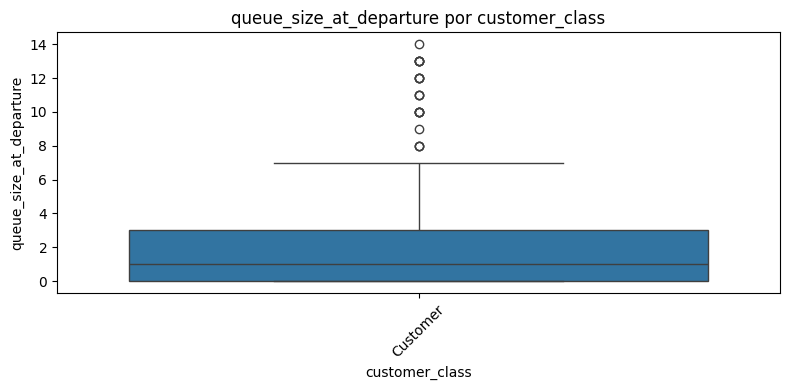

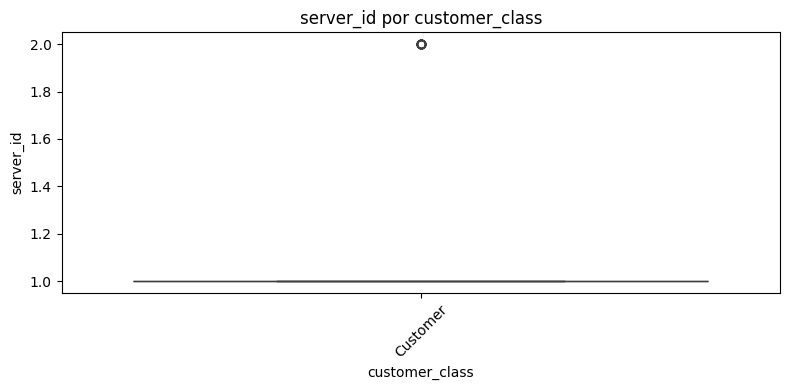

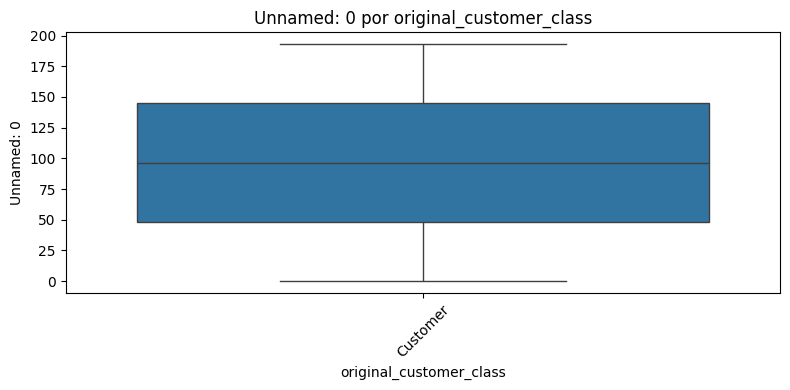

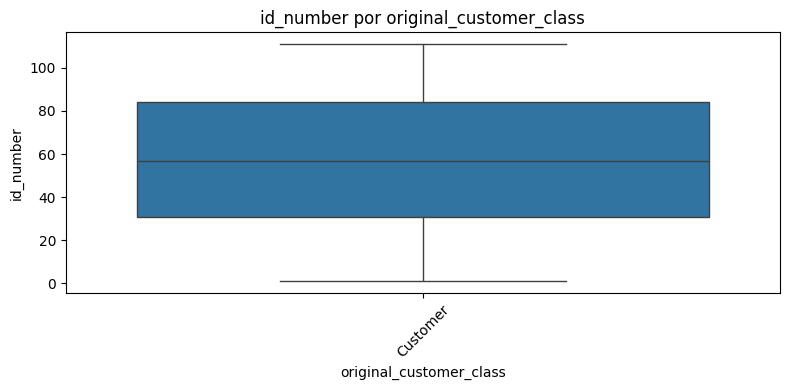

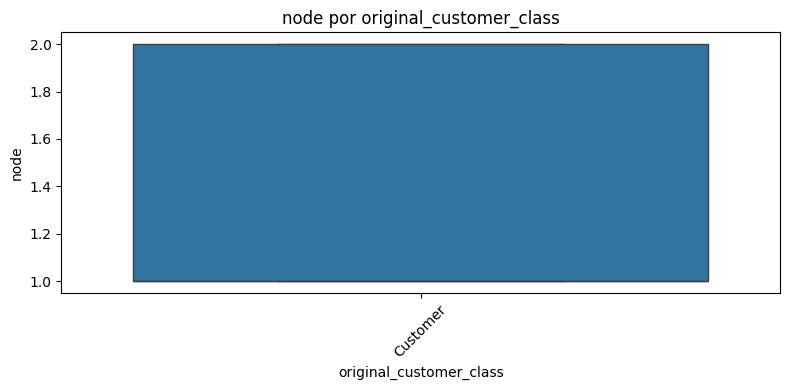

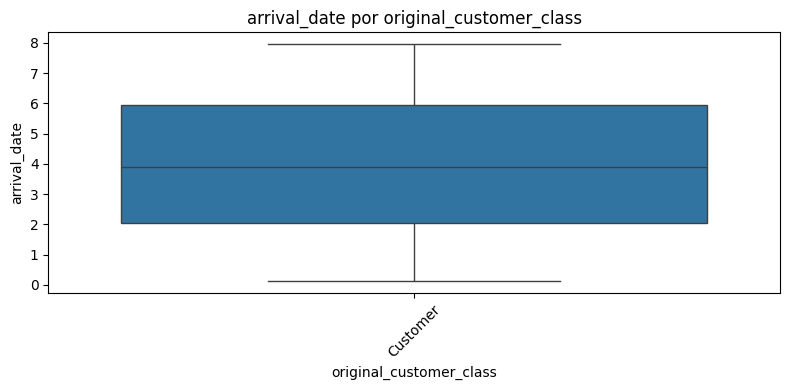

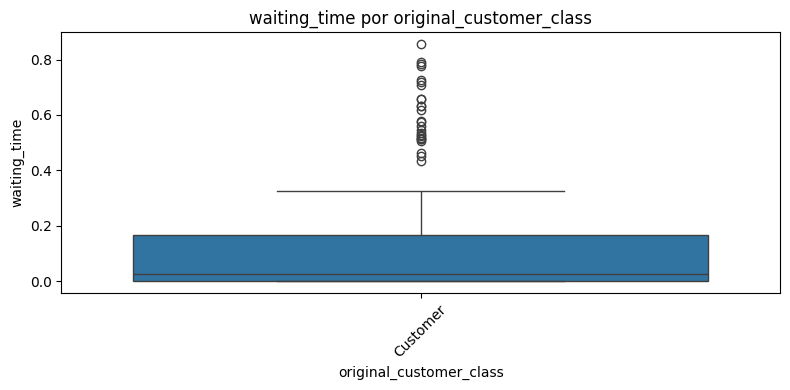

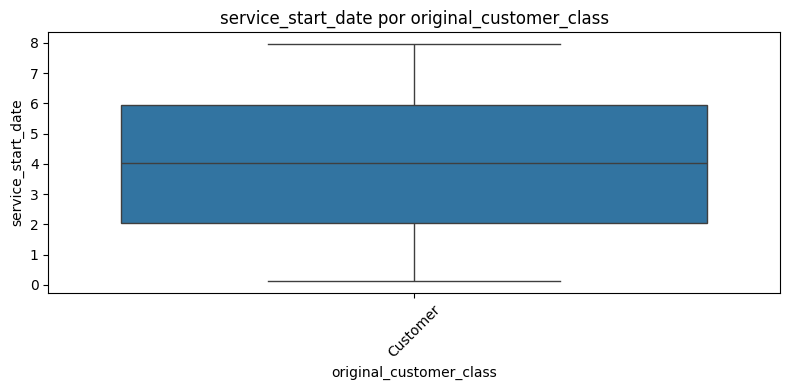

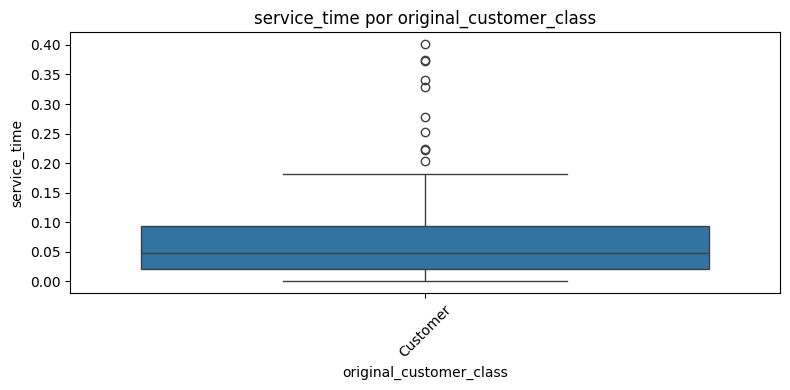

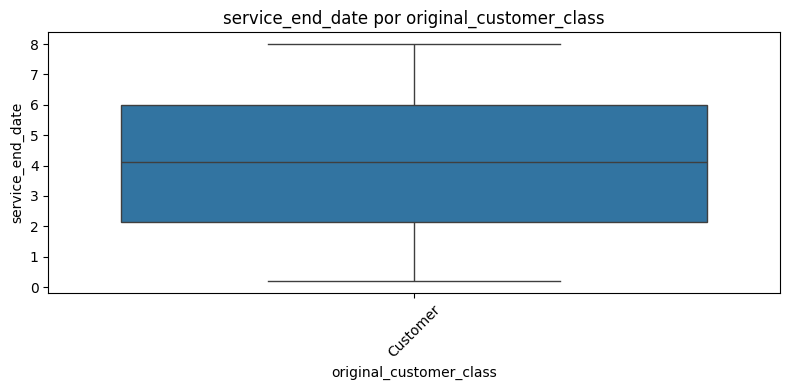

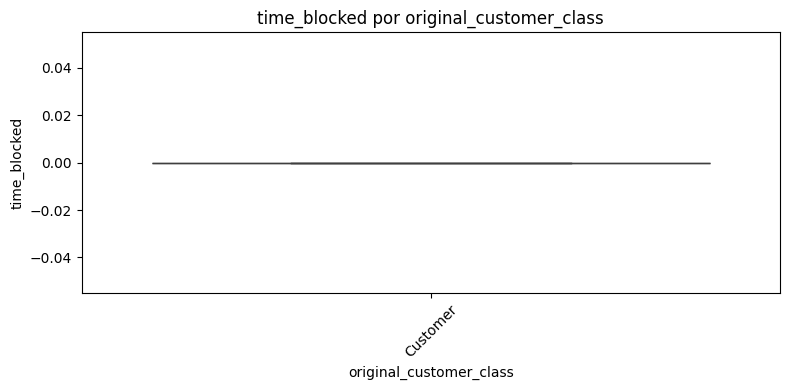

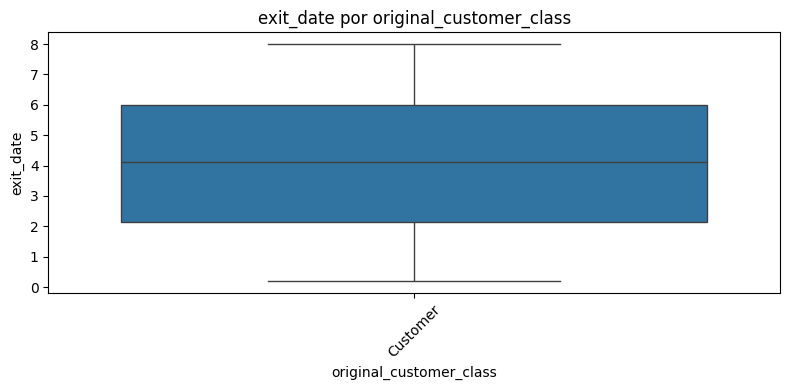

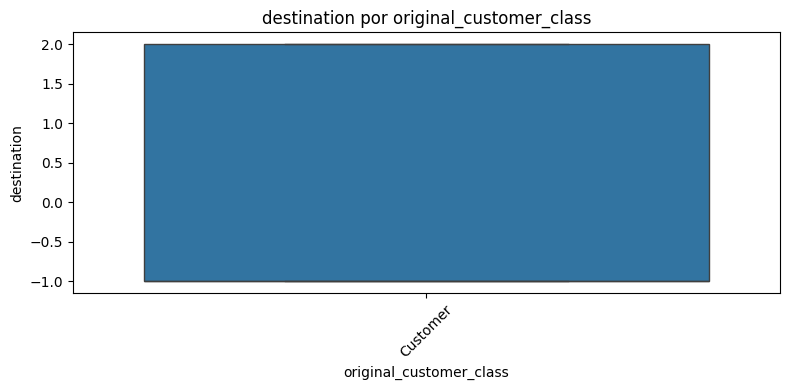

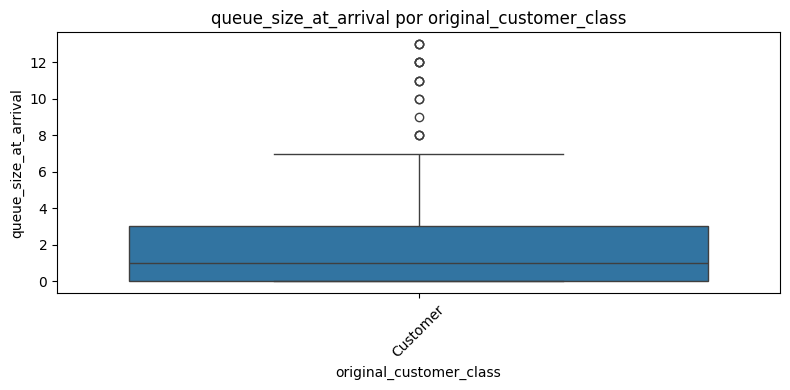

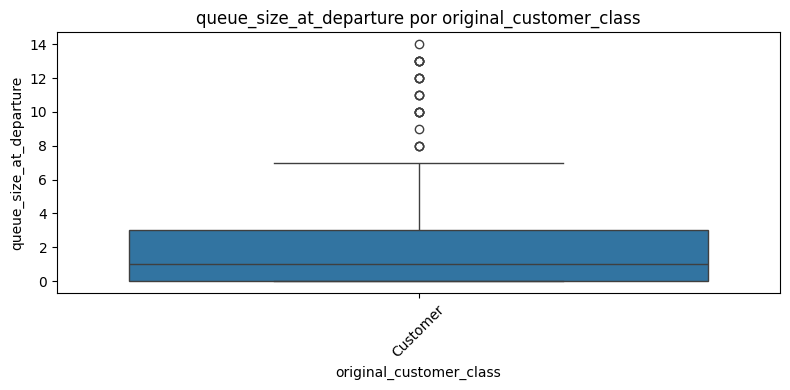

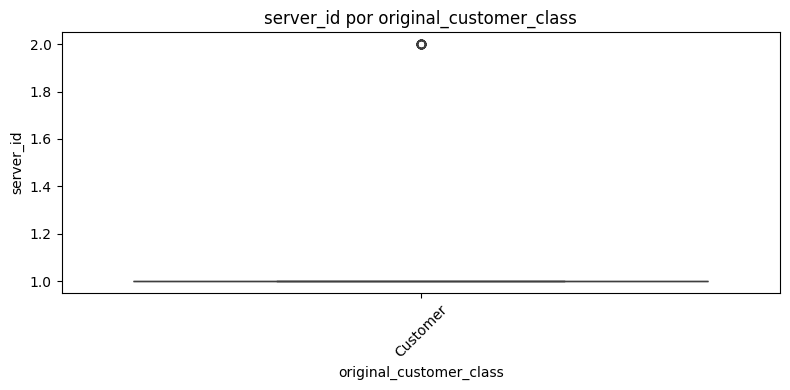

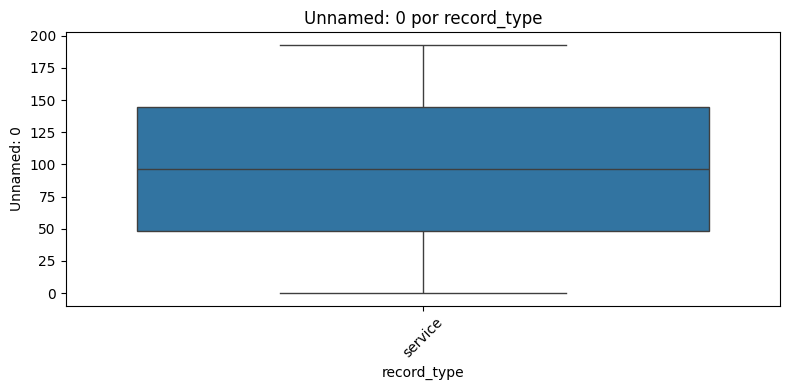

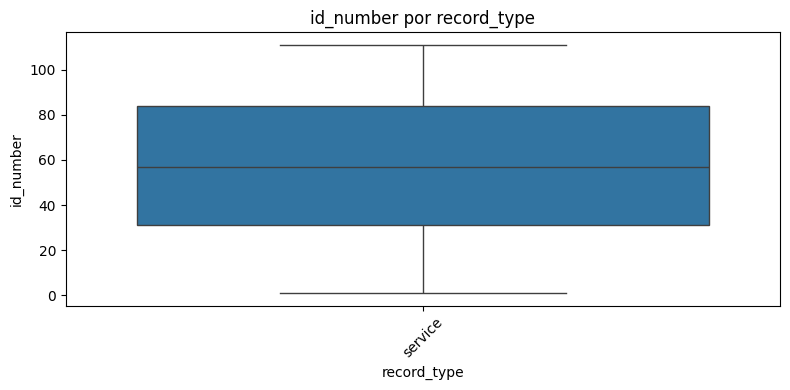

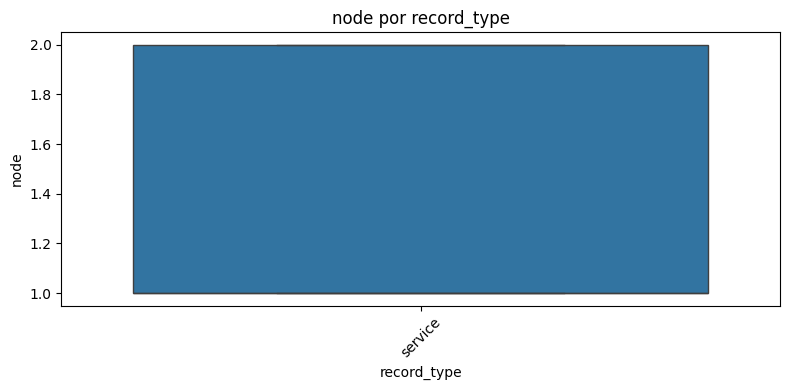

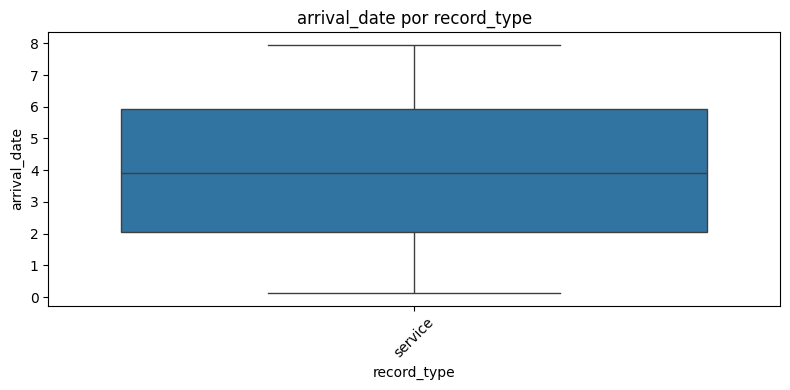

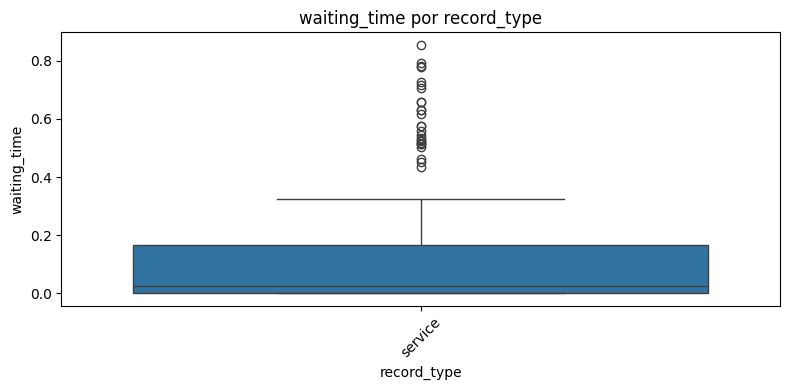

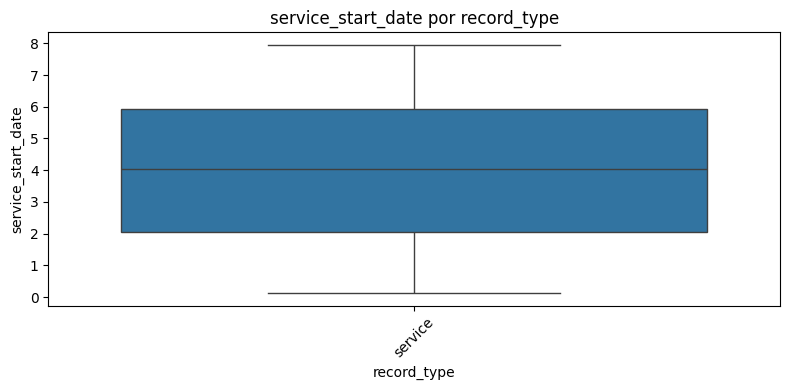

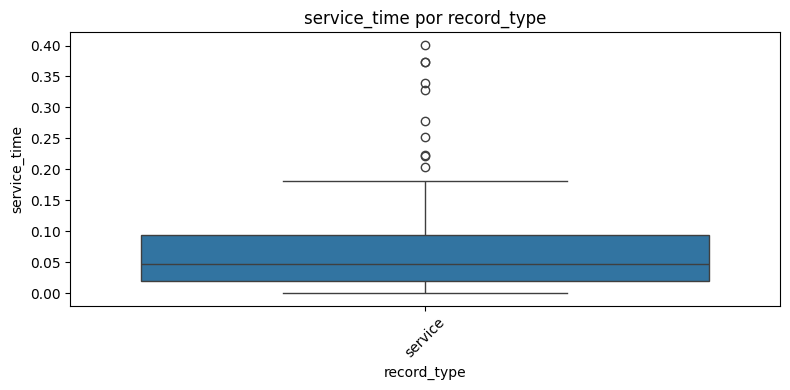

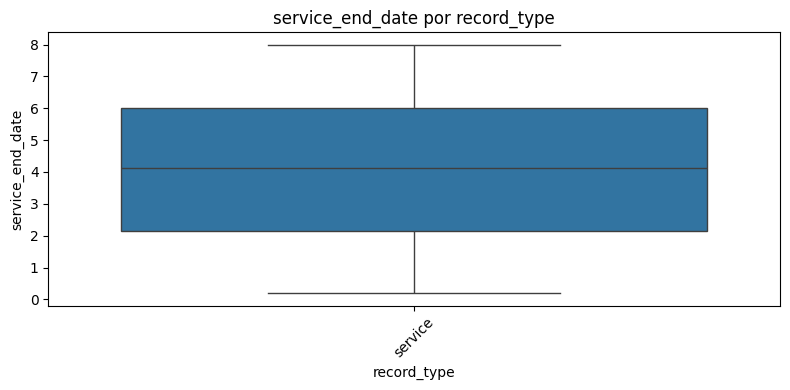

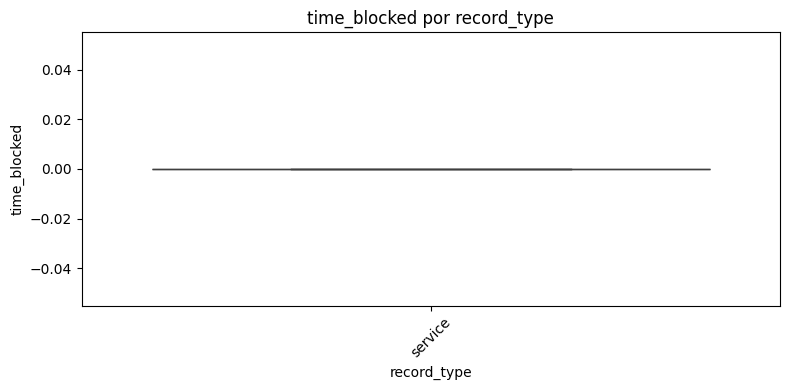

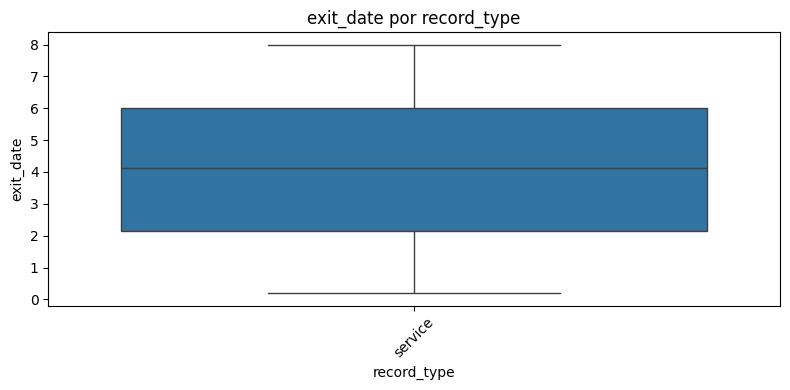

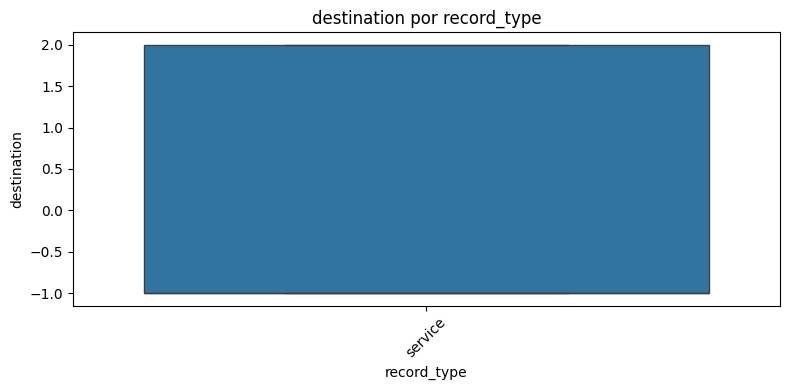

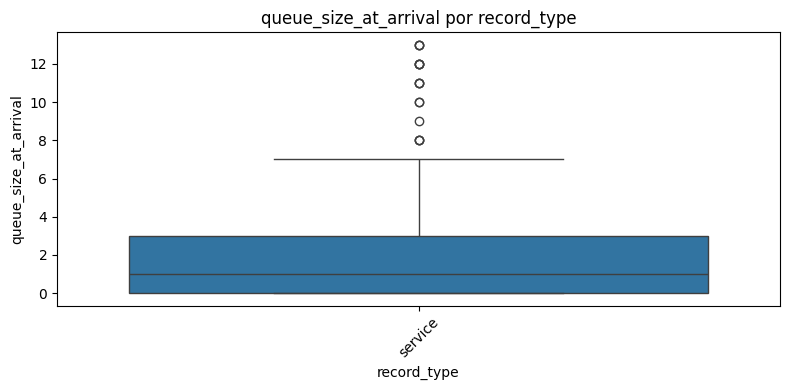

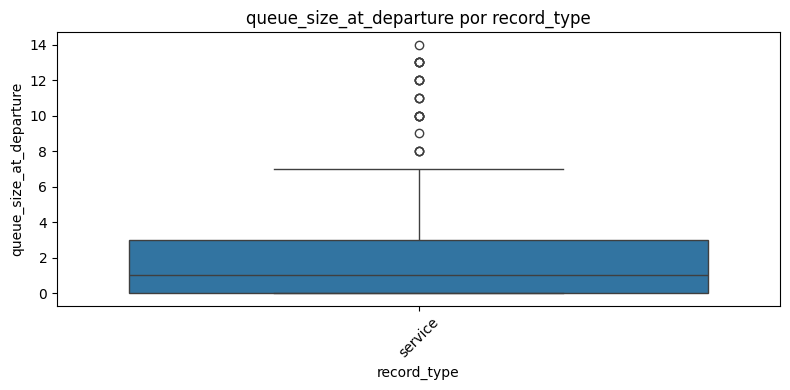

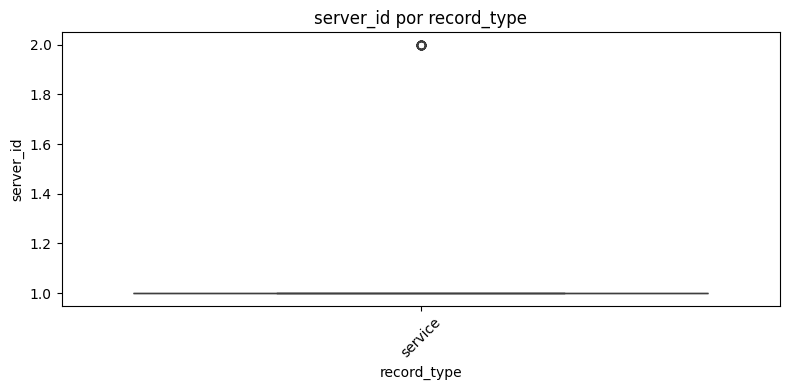

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Cargar archivo Excel
df = pd.read_excel("recsExcel.xlsx")

# 2. Mostrar las primeras filas y tipos de datos
print("Primeras filas:")
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)

# 3. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# 4. Matriz de correlación (solo numéricas)
correlation_matrix = df.corr(numeric_only=True)
print("\nMatriz de correlación:")
print(correlation_matrix)

# 5. Intervalos de confianza del 95% para columnas numéricas
def confidence_interval(series, confidence=0.95):
    n = len(series)
    mean = np.mean(series)
    std_err = stats.sem(series)
    margin = std_err * stats.t.ppf((1 + confidence) / 2., n - 1)
    return mean - margin, mean + margin

print("\nIntervalos de confianza al 95%:")
for col in df.select_dtypes(include=[np.number]).columns:
    ci_low, ci_high = confidence_interval(df[col].dropna())
    print(f"{col}: [{ci_low:.2f}, {ci_high:.2f}]")

# 6. Visualización

# a. Histograma de columnas numéricas
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histogramas de variables numéricas")
plt.tight_layout()
plt.show()

# b. Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

# c. Boxplots por categoría si hay columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f"{num} por {cat}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
